### Importando Bases

In [781]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 1. Análise Exploratória de Dados

- Verificar a distribuição das variáveis (idade, renda, tempo no site, etc.).
- Explorar possíveis relações entre as variáveis independentes e a variável alvo
(Compra).
- Identificar valores ausentes ou inconsistências nos dados.

In [785]:
dataset = pd.read_csv(r'C:\Users\Lais\Downloads\VExpenses Teste Técnico\Dataset.csv')
display(dataset)
display(dataset.info())

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
...,...,...,...,...,...,...
195,19.0,30000.0,Masculino,29.390255,NaN,1
196,NaN,50000.0,Feminino,21.024302,Sim,0
197,54.0,30000.0,Feminino,25.562014,Não,1
198,22.0,50000.0,NaN,8.313117,Não,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


None

In [786]:
vendas_df = dataset[dataset['Compra (0 ou 1)'] == 1] # Dataset com apenas os clientes que compraram
display(vendas_df)

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
2,50.0,70000.0,Feminino,6.121339,Não,1
4,59.0,50000.0,Feminino,28.235667,Sim,1
5,24.0,70000.0,Feminino,9.130098,Sim,1
6,39.0,100000.0,Feminino,14.746809,Sim,1
8,34.0,30000.0,Masculino,27.056464,Sim,1
...,...,...,...,...,...,...
184,58.0,50000.0,Feminino,14.515582,Sim,1
187,42.0,50000.0,Feminino,25.148135,NaN,1
188,37.0,50000.0,Masculino,24.750761,Não,1
195,19.0,30000.0,Masculino,29.390255,NaN,1


In [787]:
print('Clientes de %s até %s anos realizaram uma compra no site.' % (vendas_df.Idade.min(), vendas_df.Idade.max()))
print(f'A média da renda anual dos clientes que compraram no site foi de: R${vendas_df['Renda Anual (em $)'].mean().round()}')

Clientes de 19.0 até 59.0 anos realizaram uma compra no site.
A média da renda anual dos clientes que compraram no site foi de: R$56613.0


,Frequência,Porcentagem (%)
Anúncio Clicado,,
Sim,39,66.1
Não,20,33.9


Dos clientes que compraram, 66.1% clicaram no anúncio


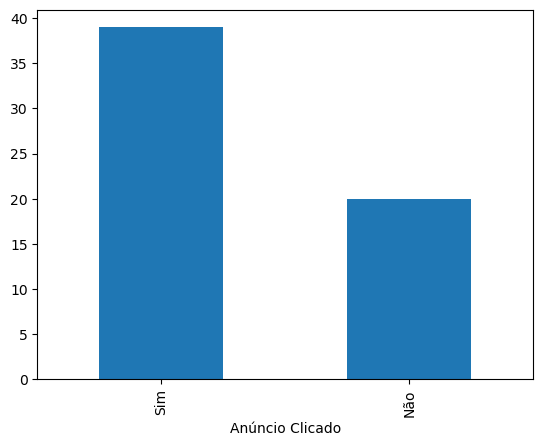

In [912]:
frequencia_anuncio = vendas_df['Anúncio Clicado'].value_counts()
percentual_anuncio = round(vendas_df['Anúncio Clicado'].value_counts(normalize = True) * 100, 1)
dist_freq_qualitativas_anuncio = pd.DataFrame({'Frequência': frequencia_anuncio, 'Porcentagem (%)': percentual_anuncio})
dist_freq_qualitativas_anuncio['Frequência'].plot.bar()
display(dist_freq_qualitativas_anuncio)
print("Dos clientes que compraram, {}% clicaram no anúncio".format(percentual_anuncio['Sim']))

In [790]:
frequencia_genero = vendas_df['Gênero'].value_counts()
percentual_genero = round(vendas_df['Gênero'].value_counts(normalize = True) * 100, 1)
dist_freq_qualitativas_gen = pd.DataFrame({'Frequência': frequencia_genero, 'Porcentagem (%)': percentual_genero})
print(f"{percentual_genero['Masculino']}% dos compradores são do gênero Masculino. {percentual_genero['Feminino']}% dos compradores são do gênero Feminino.")
display(dist_freq_qualitativas_gen)

51.6% dos compradores são do gênero Masculino. 48.4% dos compradores são do gênero Feminino.


,Frequência,Porcentagem (%)
Gênero,,
Masculino,33,51.6
Feminino,31,48.4


Os clientes que possuem renda média anual de R$30.000 representam 35.5% dos compradores


,Frequência,Porcentagem (%)
Renda Anual (em $),,
30000.0,22,35.5
70000.0,15,24.2
50000.0,14,22.6
100000.0,11,17.7


<Axes: xlabel='Renda Anual (em $)'>

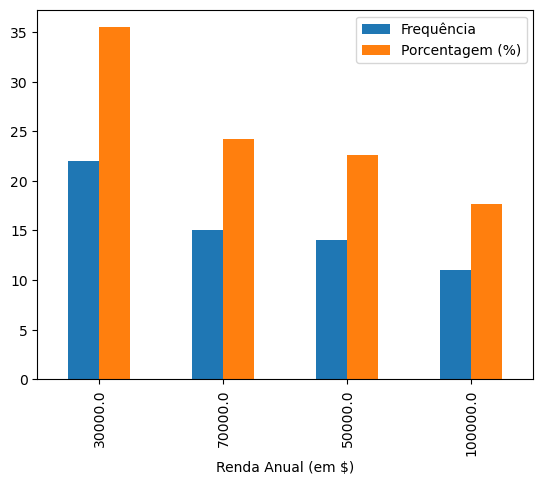

In [793]:
frequencia_renda = vendas_df['Renda Anual (em $)'].value_counts()
percentual_renda = round(vendas_df['Renda Anual (em $)'].value_counts(normalize = True) * 100, 1)
dist_freq_qualitativas_renda = pd.DataFrame({'Frequência': frequencia_renda, 'Porcentagem (%)': percentual_renda})
print('Os clientes que possuem renda média anual de R$30.000 representam 35.5% dos compradores')
display(dist_freq_qualitativas_renda)
dist_freq_qualitativas_renda.plot.bar()

A média de clientes que não clicaram no anúncio e compraram o produto é maior do que a média de clientes que clicaram e compraram.


Anúncio Clicado,Não,Sim
Compra (0 ou 1),,
Não,17.244394,16.148073
Sim,20.810194,18.208315


<Axes: xlabel='Compra (0 ou 1)'>

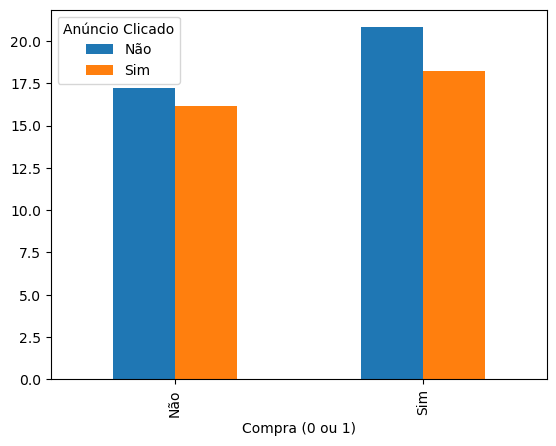

In [796]:
example = pd.crosstab(dataset['Compra (0 ou 1)'], 
                      dataset['Anúncio Clicado'],
                      aggfunc = 'mean',
                      values = dataset['Tempo no Site (min)']
            )
example.rename(index=({0: 'Não', 1: 'Sim'}), inplace=True)
print("Em média, as pessoas que gastaram mais minutos no site, compraram um imóvel.")
display(example)
example.plot.bar()

<Axes: xlabel='Idade', ylabel='Renda Anual (em $)'>

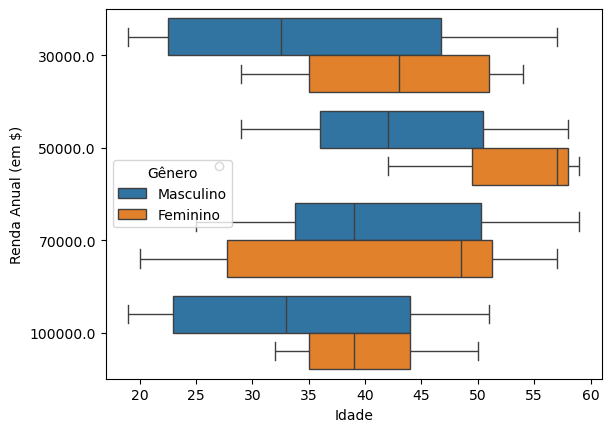

In [797]:
sns.boxplot(x='Idade', y='Renda Anual (em $)', hue='Gênero', data=vendas_df, orient='h')

Vendas por Idade e Renda Anual

In [800]:
print('Mulheres com renda média anual de R$70.000 representam uma porcentagem maior de compradores do que homens na mesma faixa')

Mulheres com renda média anual de R$70.000 representam uma porcentagem maior de compradores do que homens na mesma faixa


### 2. Pré-processamento dos Dados

- Normalizar ou padronizar variáveis numéricas, se necessário.
- Realizar codificação para variáveis categóricas, transformando-as em valores
numéricos.
- Dividir os dados em conjuntos de treino e teste.

In [806]:
dataset['Renda Anual (em $)'] = dataset['Renda Anual (em $)'].fillna(dataset['Renda Anual (em $)'].mean()).astype(int)
dataset['Idade'] = dataset['Idade'].fillna(dataset['Idade'].mean()).astype(int)
dataset['Tempo no Site (min)'] = dataset['Tempo no Site (min)'].astype(int)

In [808]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Idade                200 non-null    int32 
 1   Renda Anual (em $)   200 non-null    int32 
 2   Gênero               193 non-null    object
 3   Tempo no Site (min)  200 non-null    int32 
 4   Anúncio Clicado      190 non-null    object
 5   Compra (0 ou 1)      200 non-null    int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 7.2+ KB


In [810]:
dataset = dataset.dropna(ignore_index=True)

In [812]:
dataset['Anúncio Clicado'] = dataset['Anúncio Clicado'].replace({'Não': 0, 'Sim': 1})
dataset['Gênero'] = dataset['Gênero'].replace({'Masculino': 0, 'Feminino': 1})

C:\Users\Lais\AppData\Local\Temp\ipykernel_2680\955566154.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Anúncio Clicado'] = dataset['Anúncio Clicado'].replace({'Não': 0, 'Sim': 1})
C:\Users\Lais\AppData\Local\Temp\ipykernel_2680\955566154.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Gênero'] = dataset['Gênero'].replace({'Masculino': 0, 'Feminino': 1})


In [898]:
y = dataset['Compra (0 ou 1)'].to_numpy()
x = dataset[['Renda Anual (em $)', 'Gênero', 'Tempo no Site (min)', 'Anúncio Clicado']].to_numpy()

In [900]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 1)

### 3. Construção do Modelo de Classificação

- Treinar um modelo simples de classificação (como Regressão Logística,
Árvore de Decisão, ou Random Forest).
- Avaliar o modelo utilizando métricas apropriadas

In [904]:
reg = LogisticRegression().fit(x_train, y_train)
pred_train = reg.predict(x_train)
# reg.predict_proba(x_train)
reg.score(x_train, y_train)

0.6861313868613139

In [906]:
reg2 = LogisticRegression().fit(x_test, y_test)
pred_test = reg2.predict(x_test)
reg2.score(x_test, y_test)

0.717391304347826

In [908]:
reg2.coef_

array([[ 0.37287954, -0.08343892,  0.71066603,  0.34126749]])

In [876]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier()
modelo_rf.fit(x_train, y_train)
print("Acurácia Random Forest:", modelo_rf.score(x_test, y_test))

Acurácia Random Forest: 0.6739130434782609


### 4. Interpretação dos Resultados

- Identificar quais variáveis mais influenciaram na decisão do modelo.
- Explicar o desempenho do modelo e propor possíveis melhorias.

O modelo teve uma acurácia de 71,74% nos testes, mostrando um bom desempenho em novos dados. A diferença para o treino (68,61%) indica que ele está generalizando bem.
As variáveis que mais influenciaram a decisão do modelo foram "Tempo no Site (min)" - positivamente - e "Gênero" - negativamente.

Para melhorar:

- Validação cruzada.
- Analisar outras métricas como Precisão e Recall.
- Ajustar alguns hiperparâmetros.
- Revisar as variáveis usadas no modelo.
- No geral, o resultado é positivo, mas ainda dá para otimizar um pouco mais.